# Libraries

## Dependency building

In [19]:
pip install numpy pandas matplotlib torch torchvision pillow torchsummary

   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 2.4/203.1 MB 15.0 MB/s eta 0:00:14
   - -------------------------------------- 5.2/203.1 MB 13.9 MB/s eta 0:00:15
   - -------------------------------------- 8.1/203.1 MB 14.0 MB/s eta 0:00:14
   -- ------------------------------------- 10.7/203.1 MB 13.7 MB/s eta 0:00:15
   -- ------------------------------------- 13.1/203.1 MB 13.9 MB/s eta 0:00:14
   --- ------------------------------------ 16.5/203.1 MB 13.9 MB/s eta 0:00:14
   --- ------------------------------------ 19.4/203.1 MB 13.8 MB/s eta 0:00:14
   ---- ----------------------------------- 22.0/203.1 MB 13.8 MB/s eta 0:00:14
   ---- ----------------------------------- 24.9/203.1 MB 13.8 MB/s eta 0:00:13
   ----- ---------------------------------- 27.5/203.1 MB 13.8 MB/s eta 0:00:13
   ------ --------------------------------- 30.7/203.1 MB 13.8 MB/s eta 0:00:13
   ------ --------------------------------- 33.6/203

In [67]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126


Looking in indexes: https://download.pytorch.org/whl/cu126
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torchaudio (from versions: none)
ERROR: No matching distribution found for torchaudio


## Library Import

In [1]:
# for working with files
import os

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch

# for calculating loss
import torch.nn.functional as F

import torch.nn as nn
import torchvision.transforms as transforms

# for dataloaders
from torch.utils.data import DataLoader 
# for checking images
from PIL import Image
# for data checking
from torchvision.utils import make_grid
# for working with classes and images
from torchvision.datasets import ImageFolder
# for getting the summary of our model
from torchsummary import summary

# plot directly in notebook
%matplotlib inline

# Data Preprocessing

## EDA

### Data Directories

In [15]:
data_dir = "../Plant-Disease-Detection-Using-CNN/Data"
train_dir = data_dir + "/train/"
valid_dir = data_dir + "/valid"
categories = os.listdir(train_dir)

### Explore the training data

In [16]:
# To store all th unique plants
unique_plants = []
# To store no of dieseases
no_of_diseases = 0

# iterate over the categories
for plant in categories:
    # add to unique plants if not visited before
    if plant.split('___')[0] not in unique_plants:
        unique_plants.append(plant.split('___')[0])
    # seperate healthy plants and increase number for each unhealthy ones
    if plant.split('___')[1] != 'healthy':
        no_of_diseases += 1

In [20]:
# All the Categories (healthy and unhealthy)
print(f"Diseases: {categories}\n")
# All the plants
print(f"Unique Plants are : {unique_plants}\n\n")

# Total Diseases
print(f"Total Categories  : {len(categories)}")
# No of Unhealthy ones
print(f"Number of diseases: {no_of_diseases}")
# Unique diseases 
print(f"Number of plants  : {len(unique_plants)}")

Diseases: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spi

In [26]:
# dictionary to store {Category : Value_In_That_Category}
img_per_class_dict = {}
for category in categories:
    img_per_class_dict[category] = len(os.listdir(train_dir + '/' + category))

# each category has certain no of images
# img_per_class = category: no_of_images
img_per_class = pd.DataFrame(img_per_class_dict.values(), index=img_per_class_dict.keys(), columns=["no. of images"])
img_per_class

no. of images
Apple___Apple_scab                                           2016
Apple___Black_rot                                            1987
Apple___Cedar_apple_rust                                     1760
Apple___healthy                                              2008
Blueberry___healthy                                          1816
Cherry_(including_sour)___healthy                            1826
Cherry_(including_sour)___Powdery_mildew                     1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Corn_(maize)___Common_rust_                                  1907
Corn_(maize)___healthy                                       1859
Corn_(maize)___Northern_Leaf_Blight                          1908
Grape___Black_rot                                            1888
Grape___Esca_(Black_Measles)                                 1920
Grape___healthy                                              1692
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Orange___Haunglongbing_(Citrus_greening)                     2010
Peach___Bacterial_spot                                       1838
Peach___healthy                                              1728
Pepper,_bell___Bacterial_spot                                1913
Pepper,_bell___healthy                                       1988
Potato___Early_blight                                        1939
Potato___healthy                                             1824
Potato___Late_blight                                         1939
Raspberry___healthy                                          1781
Soybean___healthy                                            2022
Squash___Powdery_mildew                                      1736
Strawberry___healthy                                         1824
Strawberry___Leaf_scorch                                     1774
Tomato___Bacterial_spot                                      1702
Tomato___Early_blight                                        1920
Tomato___healthy                                             1926
Tomato___Late_blight                                         1851
Tomato___Leaf_Mold                                           1882
Tomato___Septoria_leaf_spot                                  1745
Tomato___Spider_mites Two-spotted_spider_mite                1741
Tomato___Target_Spot                                         1827
Tomato___Tomato_mosaic_virus                                 1790
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961

### Visualize Our EDA Findings

Text(0.5, 1.0, 'Images in Each CLass (Plants)')

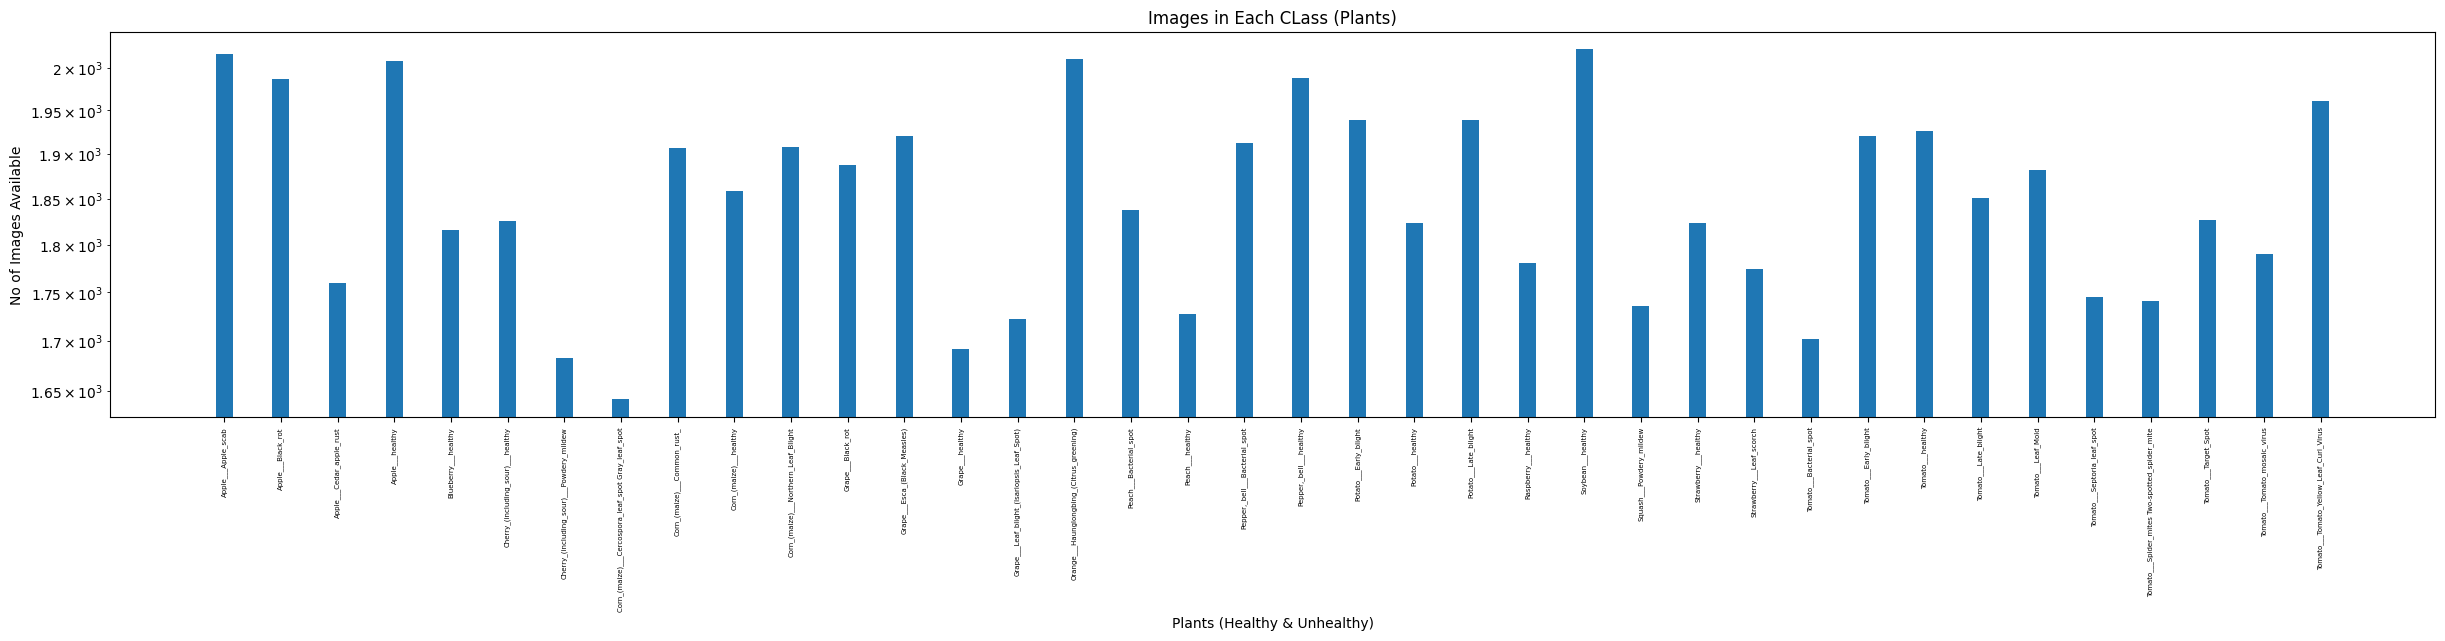

In [28]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(30, 5))
plt.bar(index, [n for n in img_per_class_dict.values()], width=0.3)
plt.yscale('log')
plt.xlabel('Plants (Healthy & Unhealthy)', fontsize=10)
plt.ylabel('No of Images Available', fontsize=10)
plt.xticks(index, categories, fontsize=5, rotation=90)
plt.title('Images in Each CLass (Plants)')

**Training dataset information:**

So we have found out that in the training dataset there are toatl 14 types of plants which are suffering from 26 types of diseases. There are 12 types of healthy plants.

## Data Processing

### Data transform to tensor 

In [29]:
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 

### Data Checking

In [34]:
# Check Image Shape
img, label = train[0]
print(img.shape)

# Channel should be 3
# Size should be 256 * 256

torch.Size([3, 256, 256])


In [45]:
def show_image(dataset, image, label):
    print("Label :" + dataset.classes[label] + "(" + str(label) + ")")
    plt.figure()
    plt.imshow(image.permute(1, 2, 0))
    plt.show()

[815, 844, 5750]
Label :Apple___Apple_scab(0)


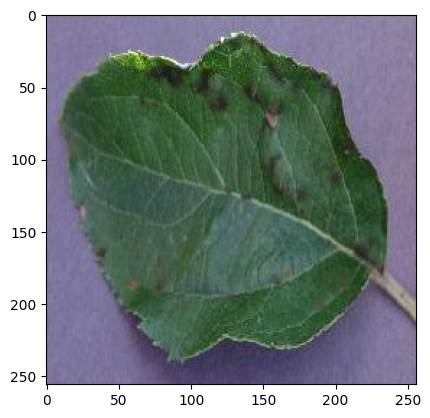

Label :Apple___Apple_scab(0)


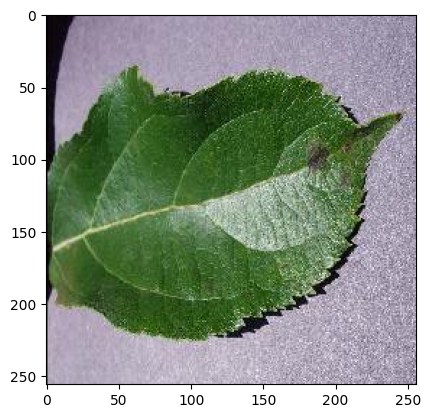

Label :Apple___Cedar_apple_rust(2)


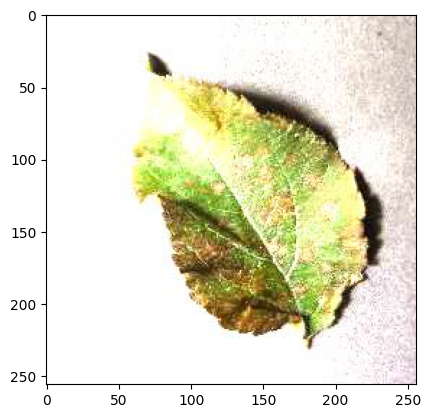

In [46]:
# Show 3 random images from the train dataset
import random
random_indices = [random.randint(1, 6000) for _ in range(3)]
print(f"{random_indices}")

for i in random_indices:
    show_image(train, *train[i])

### Random Seed Across the environment

In [49]:
# Set the random seed value
def set_seed(seed):
    # Set seed for reproducibility in Python's random module
    random.seed(seed)

    # Set seed for NumPy (which might be used in data processing)
    np.random.seed(seed)

    # Set seed for PyTorch (both CPU and CUDA)
    torch.manual_seed(seed)

    # set the seed for the CUDA backend
    torch.cuda.manual_seed(seed)

    # Ensure deterministic behavior for some operations
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(8)

### Data Loading

In [51]:
batch_size = 32
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [52]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

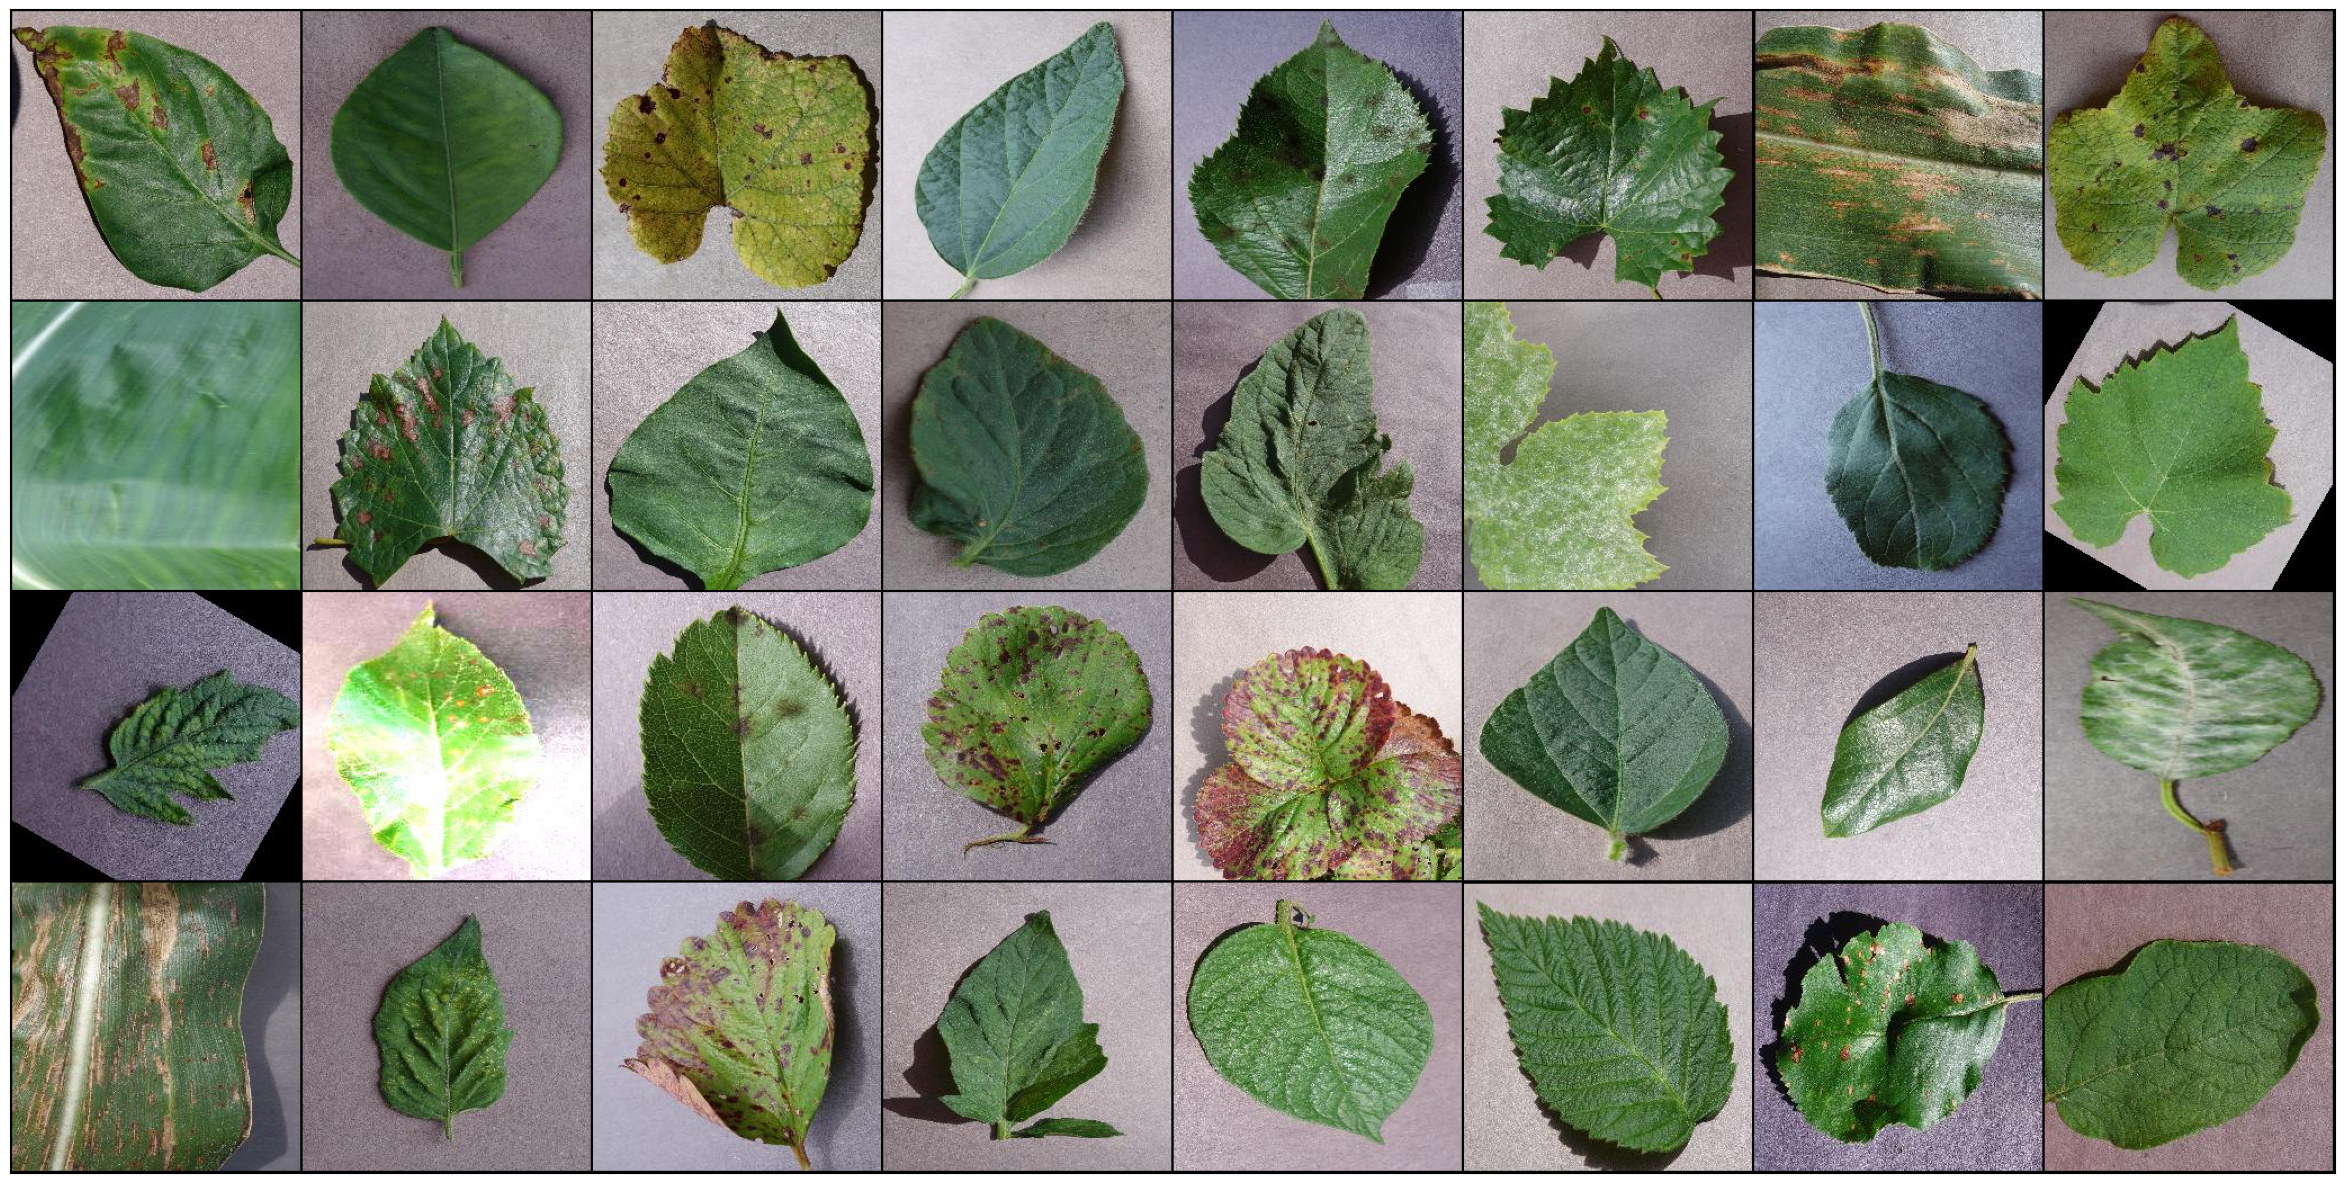

In [54]:
show_batch(train_dl)

# Modelling

## Selecting GPU if available

In [55]:
# For moving data into GPU (if available)
def get_default_device():
    """Use GPU if available, else use CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [58]:
# Checking the device we are working with
device = get_default_device()
device

device(type='cuda')

In [59]:
# Moving data into GPU
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

## Model Architechture

### Residual Block

In [60]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x

### Utility Functions for tracking the model

In [62]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss  
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))

### Convolution Block

In [63]:
# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)

### ResNet Architechture

In [64]:
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out    

# Training

In [66]:
import torch
print(torch.cuda.is_available())

False


In [65]:
# defining the model and moving it to the GPU
model = to_device(ResNet9(3, len(train.classes)), device) 
model

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x00000214AE2BE2A0>
Traceback (most recent call last):
  File "c:\Users\Senpai\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "c:\Users\Senpai\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py", line 1562, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
                                   ^^^^^^^^^^^^^^^^^^^^
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


AssertionError: Torch not compiled with CUDA enabled

In [ ]:
# getting summary of the model
INPUT_SHAPE = (3, 256, 256)
print(summary(model.cuda(), (INPUT_SHAPE)))